# Your Results of Comparing Query Performance?


I meassured with the data as described in the exercise and with a VM configuration like:


```ruby
  config.vm.provider "virtualbox" do |vb|
    vb.memory = "8192"
    vb.cpus = "2"
    vb.name = "dbdev"
  end
```

and the following two parameters set in `/etc/neo4j/neo4j.conf`

```
dbms.memory.heap.initial_size=4096m
dbms.memory.heap.max_size=7168m
```

If you give Neo4j less RAM then you do not really measure the actual query time.


The times below were measured for the following queries starting from twenty random nodes:


```python
names = ['Kirk Layell', 'Jaime Collum', 'Dinorah Newborn', 'Tana Leston', 
         'Garry Bairo', 'Bradley Sidener', 'Mirna Kaelker',
         'Houston Delilli', 'Tresa Parrigan', 'Barton Jepson',
         'Clemente Kuta', 'Shirley Tricoche', 'Hanna Bacone',
         'Maybell Ramo', 'Randell Wienecke', 'Theron Esche',
         'Colton Kerne', 'Nigel Bayly', 'Norberto Dudak', 'Odell Seki']
```

```python
q1_schema = r'MATCH (:Person {name: "%s"})-[:ENDORSES]->(m) RETURN DISTINCT count(m) AS count'
q2_schema = r'MATCH (:Person {name: "%s"})-[:ENDORSES*2]->(m) RETURN DISTINCT count(m) AS count'
q3_schema = r'MATCH (:Person {name: "%s"})-[:ENDORSES*3]->(m) RETURN DISTINCT count(m) AS count'
q4_schema = r'MATCH (:Person {name: "%s"})-[:ENDORSES*4]->(m) RETURN DISTINCT count(m) AS count'
q5_schema = r'MATCH (:Person {name: "%s"})-[:ENDORSES*5]->(m) RETURN DISTINCT count(m) AS count'
```

```python
q1_schema = """SELECT COUNT(DISTINCT ue1.user_2)
FROM oioioi.t_user_endorses ue1
WHERE ue1.user_1 = %s;"""
q2_schema = """SELECT COUNT(DISTINCT ue2.user_2)
FROM oioioi.t_user_endorses ue1
INNER JOIN oioioi.t_user_endorses ue2 ON ue1.user_2 = ue2.user_1
WHERE ue1.user_1 = %s;"""
q2_schema = """SELECT COUNT(DISTINCT ue2.user_2)
FROM oioioi.t_user_endorses ue1
INNER JOIN oioioi.t_user_endorses ue2 ON ue1.user_2 = ue2.user_1
WHERE ue1.user_1 = %s;"""
q3_schema = """SELECT COUNT(DISTINCT ue3.user_2)
FROM oioioi.t_user_endorses ue1
INNER JOIN oioioi.t_user_endorses ue2 ON ue1.user_2 = ue2.user_1
INNER JOIN oioioi.t_user_endorses ue3 ON ue2.user_2 = ue3.user_1
WHERE ue1.user_1 = %s;"""
q4_schema = """SELECT COUNT(DISTINCT ue4.user_2)
FROM oioioi.t_user_endorses ue1
INNER JOIN oioioi.t_user_endorses ue2 ON ue1.user_2 = ue2.user_1
INNER JOIN oioioi.t_user_endorses ue3 ON ue2.user_2 = ue3.user_1
INNER JOIN oioioi.t_user_endorses ue4 ON ue3.user_2 = ue4.user_1
WHERE ue1.user_1 = %s;"""
q5_schema = """SELECT COUNT(DISTINCT ue5.user_2)
FROM oioioi.t_user_endorses ue1
INNER JOIN oioioi.t_user_endorses ue2 ON ue1.user_2 = ue2.user_1
INNER JOIN oioioi.t_user_endorses ue3 ON ue2.user_2 = ue3.user_1
INNER JOIN oioioi.t_user_endorses ue4 ON ue3.user_2 = ue4.user_1
INNER JOIN oioioi.t_user_endorses ue5 ON ue4.user_2 = ue5.user_1
WHERE ue1.user_1 = %s;"""
```

In [8]:
import matplotlib
%matplotlib notebook 
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


sql_8gb = np.array([[0.84912109375, 0.52587890625, 0.541015625, 0.806884765625, 0.695068359375, 0.697998046875, 0.625244140625, 0.572998046875, 0.6240234375, 0.52294921875, 0.64990234375, 0.447998046875, 0.478759765625, 0.427001953125, 0.444091796875, 0.381103515625, 0.7470703125, 0.574951171875, 0.531005859375, 0.542236328125], 
                    [1.537109375, 0.9638671875, 0.86328125, 4.4951171875, 1.329345703125, 0.85693359375, 1.307861328125, 3.89501953125, 3.26806640625, 0.473876953125, 1.23193359375, 0.7509765625, 2.803955078125, 0.59521484375, 1.3330078125, 0.548095703125, 3.005126953125, 7.281982421875, 0.8330078125, 3.02099609375], 
                    [15.179931640625, 8.778076171875, 7.329833984375, 141.302978515625, 24.011962890625, 23.491943359375, 26.81689453125, 201.469970703125, 172.676025390625, 0.5869140625, 40.88671875, 16.2607421875, 73.474365234375, 6.7822265625, 31.292724609375, 4.625244140625, 192.702880859375, 253.125244140625, 12.248046875, 60.995849609375], 
                    [342.85498046875, 352.892822265625, 295.615234375, 3498.69482421875, 541.69384765625, 466.489013671875, 407.30908203125, 3862.68212890625, 3798.88330078125, 0.69091796875, 915.155029296875, 259.43701171875, 1843.89111328125, 161.962890625, 975.741943359375, 104.298095703125, 3861.6220703125, 6921.287109375, 306.0419921875, 1598.081787109375], 
                    [9180.5146484375, 9522.466796875, 9692.98291015625, 97297.31811523438, 15163.410888671875, 14251.27783203125, 11194.610107421875, 105916.119140625, 115848.55908203125, 0.982177734375, 28754.836181640625, 8975.184326171875, 57317.031005859375, 6172.794189453125, 30151.31982421875, 3237.214111328125, 113300.02392578125, 181191.46484375, 8200.966064453125, 43609.33203125]])

cypher_8gb = np.array([[3.703857421875, 2.35400390625, 7.94189453125, 1.462890625, 2.5400390625, 1.3388671875, 2.166015625, 2.5810546875, 1.4208984375, 1.623046875, 1.47900390625, 2.6328125, 1.4541015625, 1.322998046875, 1.248779296875, 1.5361328125, 2.02978515625, 1.492919921875, 1.89208984375, 2.195068359375], 
                       [4.01611328125, 1.699951171875, 1.630859375, 4.136962890625, 1.747314453125, 1.922119140625, 1.47021484375, 2.587890625, 2.25390625, 2.430908203125, 3.8642578125, 1.7080078125, 1.99609375, 1.430908203125, 2.676025390625, 1.528076171875, 2.14599609375, 5.02685546875, 3.2919921875, 3.30322265625], 
                       [3.859130859375, 3.614990234375, 2.943115234375, 21.642822265625, 3.94580078125, 3.970947265625, 4.030029296875, 23.97802734375, 24.184814453125, 1.477783203125, 9.349853515625, 3.162109375, 11.539794921875, 2.93212890625, 6.56298828125, 2.156005859375, 25.073974609375, 41.512939453125, 8.419921875, 16.580078125], 
                       [56.025146484375, 59.939208984375, 41.83203125, 434.148193359375, 72.237060546875, 73.783935546875, 55.8642578125, 477.25, 520.0908203125, 2.89697265625, 132.690185546875, 41.0048828125, 292.85595703125, 33.06201171875, 144.742919921875, 16.89501953125, 498.556884765625, 808.117919921875, 44.55224609375, 197.862060546875], 
                       [1009.81884765625, 1009.36572265625, 980.078857421875, 9687.740966796875, 1568.075927734375, 1485.94775390625, 1131.094970703125, 10718.056884765625, 11303.607177734375, 2.44091796875, 2786.1611328125, 932.58984375, 5793.34423828125, 635.780029296875, 3015.93798828125, 338.64599609375, 11403.488037109375, 18386.447021484375, 859.84814453125, 4438.5361328125]])

tbl_label = ['one', 'two', 'three', 'four', 'five']
sql_stats = [(np.mean(el), np.median(el)) for el in sql_8gb]
cypher_stats = [(np.mean(el), np.median(el)) for el in cypher_8gb]
cypher_sql_ratio = [n / s for (s, _), (n, _) in zip(sql_stats, cypher_stats)]

sql_avg_t = [t for t, _ in sql_stats]
cypher_avg_t = [t for t, _ in cypher_stats]

In [2]:
# Run this one to generate the following table
print('||MySQL Average| MySQL Median| Neo4j Average| Neo4j Median|Cypher/SQL Avg. Ratio')
print('|------|:------:|:-----:|:------:|:------:|:------:|')
for line in zip(tbl_label, sql_stats, cypher_stats, cypher_sql_ratio):
    l, (s_a, s_m), (n_a, n_m), r = line
    print('|Depth %s:| %.3f | %.3f | %.3f | %.3f | %.3f |' % (l, s_a, s_m, n_a, n_m, r))

||MySQL Average| MySQL Median| Neo4j Average| Neo4j Median|Cypher/SQL Avg. Ratio
|------|:------:|:-----:|:------:|:------:|:------:|
|Depth one:| 0.584 | 0.558 | 2.221 | 1.758 | 3.801 |
|Depth two:| 2.020 | 1.319 | 2.543 | 2.200 | 1.259 |
|Depth three:| 65.702 | 25.414 | 11.047 | 5.297 | 0.168 |
|Depth four:| 1525.766 | 504.091 | 200.220 | 73.010 | 0.131 |
|Depth five:| 43448.920 | 14707.344 | 4374.350 | 1527.012 | 0.101 |


||MySQL Average| MySQL Median| Neo4j Average| Neo4j Median|Cypher/SQL Avg. Ratio
|------|:------:|:-----:|:------:|:------:|:------:|
|Depth one:| 0.584 | 0.558 | 2.221 | 1.758 | 3.801 |
|Depth two:| 2.020 | 1.319 | 2.543 | 2.200 | 1.259 |
|Depth three:| 65.702 | 25.414 | 11.047 | 5.297 | 0.168 |
|Depth four:| 1525.766 | 504.091 | 200.220 | 73.010 | 0.131 |
|Depth five:| 43448.920 | 14707.344 | 4374.350 | 1527.012 | 0.101 |

<IPython.core.display.Javascript object>


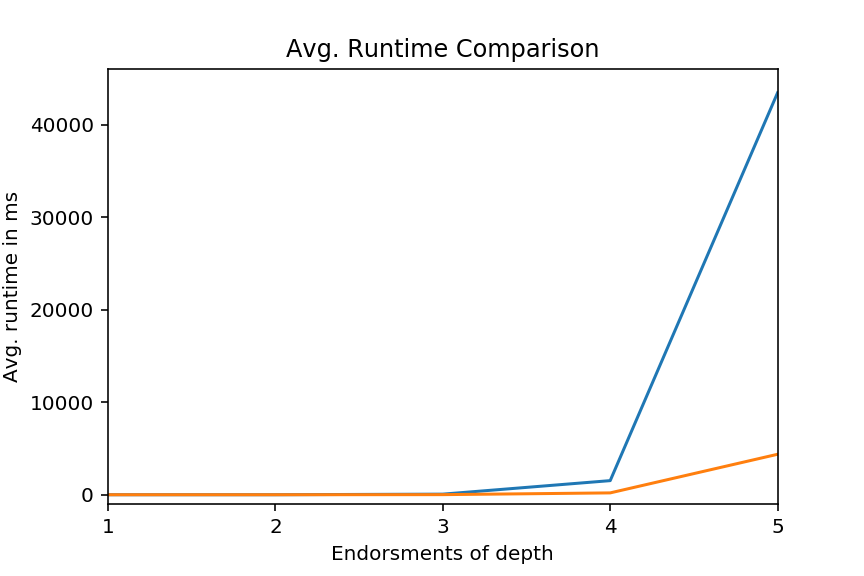

In [11]:
plt.cla()
plt.plot(range(1, len(sql_avg_t) + 1), sql_avg_t)
plt.plot(range(1, len(sql_avg_t) + 1), cypher_avg_t)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.title('Avg. Runtime Comparison')
plt.xlabel('Endorsments of depth')
plt.ylabel('Avg. runtime in ms')
plt.axis([1, 5, -1000, 46000])
plt.xticks(range(1, len(sql_avg_t) + 1), range(1, len(sql_avg_t) + 1))
plt.show()

# Why is Neo4j faster than MySQL?

See [Neo4j Performance.pdf](./Neo4j Performance.pdf).